___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
(Waad and Noof)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [3]:
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [4]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


## Explore Data

In [5]:
df_copy.describe()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,SubjectId
count,6068.000,4082.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,...,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,1986.000
mean,1697.499,20003.371,246.469,1406.161,327.374,224.891,1299.609,244.193,194.755,399.204,340.934,274.735,490.754,72.253,324.897,...,460.525,317.750,914.501,229.674,377.004,1031.501,79.709,169.003,830.060,17.515,1.615,29.761,68.257,174.750,22306.606
std,1133.004,6568.435,37.400,79.091,20.720,16.052,72.022,16.845,13.516,30.237,41.520,19.221,42.136,5.345,17.088,...,36.678,36.363,114.275,35.613,31.618,62.702,15.653,13.125,47.651,550.950,0.979,8.675,3.862,33.692,20904.730
min,0.000,10027.000,155.000,1115.000,249.000,156.000,1038.000,186.000,151.000,283.000,216.000,197.000,357.000,55.000,267.000,...,345.000,211.000,611.000,138.000,289.000,805.000,35.800,124.000,672.000,1.000,1.000,17.000,56.000,0.000,10037.000
25%,758.000,14270.250,219.000,1350.000,313.000,214.000,1249.000,232.000,185.000,376.000,311.000,262.000,460.000,68.000,314.000,...,435.000,292.000,829.000,203.000,355.000,988.000,68.200,159.000,797.000,1.000,1.000,23.000,66.000,150.000,17667.000
50%,1516.500,17236.500,242.000,1410.000,328.000,225.000,1302.000,245.000,195.000,404.000,341.000,274.000,492.000,72.000,326.000,...,463.000,316.000,907.000,226.000,375.000,1033.000,78.500,170.000,830.000,1.000,1.000,28.000,68.000,173.000,22096.500
75%,2564.250,27315.750,271.000,1462.000,341.250,235.000,1349.000,256.000,204.000,421.000,370.000,288.000,520.000,76.000,336.000,...,486.000,343.000,992.000,252.250,398.000,1076.000,89.600,179.000,863.000,2.000,2.000,36.000,71.000,196.000,26089.750
max,4081.000,29452.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,362.000,637.000,91.000,385.000,...,598.000,461.000,1379.000,406.000,494.000,1245.000,144.200,216.000,1009.000,42351.000,8.000,58.000,94.000,321.000,920103.000


In [6]:
df_copy.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [7]:
df_copy["WritingPreference"].value_counts()

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [8]:
df_copy["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [9]:
df_copy = df_copy.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "subjectid",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)

# "SubjectsBirthLocation"
# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

In [10]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
DODRace,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,...,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
2,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,...,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
3,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,...,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679
4,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
5,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
6,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [11]:
# #check if our data is palanced or not
# for column in df.columns:
#     # Use value_counts() to count the occurrences of each element in the column
#     column_counts = df[column].value_counts()

#     # Print the column name and its count
#     print(f"Column '{column}':")
#     print(column_counts)
#     print()#check if our data is palanced or not
# for column in df.columns:
#     # Use value_counts() to count the occurrences of each element in the column
#     column_counts = df[column].value_counts()

#     # Print the column name and its count
#     print(f"Column '{column}':")
#     print(column_counts)
#     print()

In [12]:
# Just DODRace with > 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,...,1700,501,329,933,240,440,1054,81.500,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,...,1627,432,316,870,225,371,1054,72.600,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,...,1678,472,329,964,255,411,1041,92.900,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,...,1625,461,315,857,205,399,968,79.400,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,...,1679,467,303,868,214,379,1245,94.600,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,...,1706,447,334,1043,265,370,1002,83.200,162,836,Female,Texas,3,51,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,...,1648,446,334,971,243,374,958,71.700,157,804,Female,Texas,3,40,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,...,1590,444,335,982,254,351,970,76.200,159,774,Female,Texas,2,40,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,...,1525,450,298,837,208,335,952,63.200,146,769,Female,Texas,3,31,Right hand


In [13]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [14]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [15]:
# # Check missing value
# df_copy.isnull().sum()

Nulls = 0
for column in df_copy:
    # Check for null values in each column
    null_values = df_copy[column].isnull().sum()
    Nulls = null_values + Nulls


# # Set display options to show all columns
# pd.set_option('display.max_columns', None)

# Display the null values for each column
Nulls

0

In [16]:
# The is better to detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df_copy.columns:
    # Calculate the number of null values in the column
    null_count = df_copy[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
# Check duplicates
df.duplicated().sum()

0

In [18]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

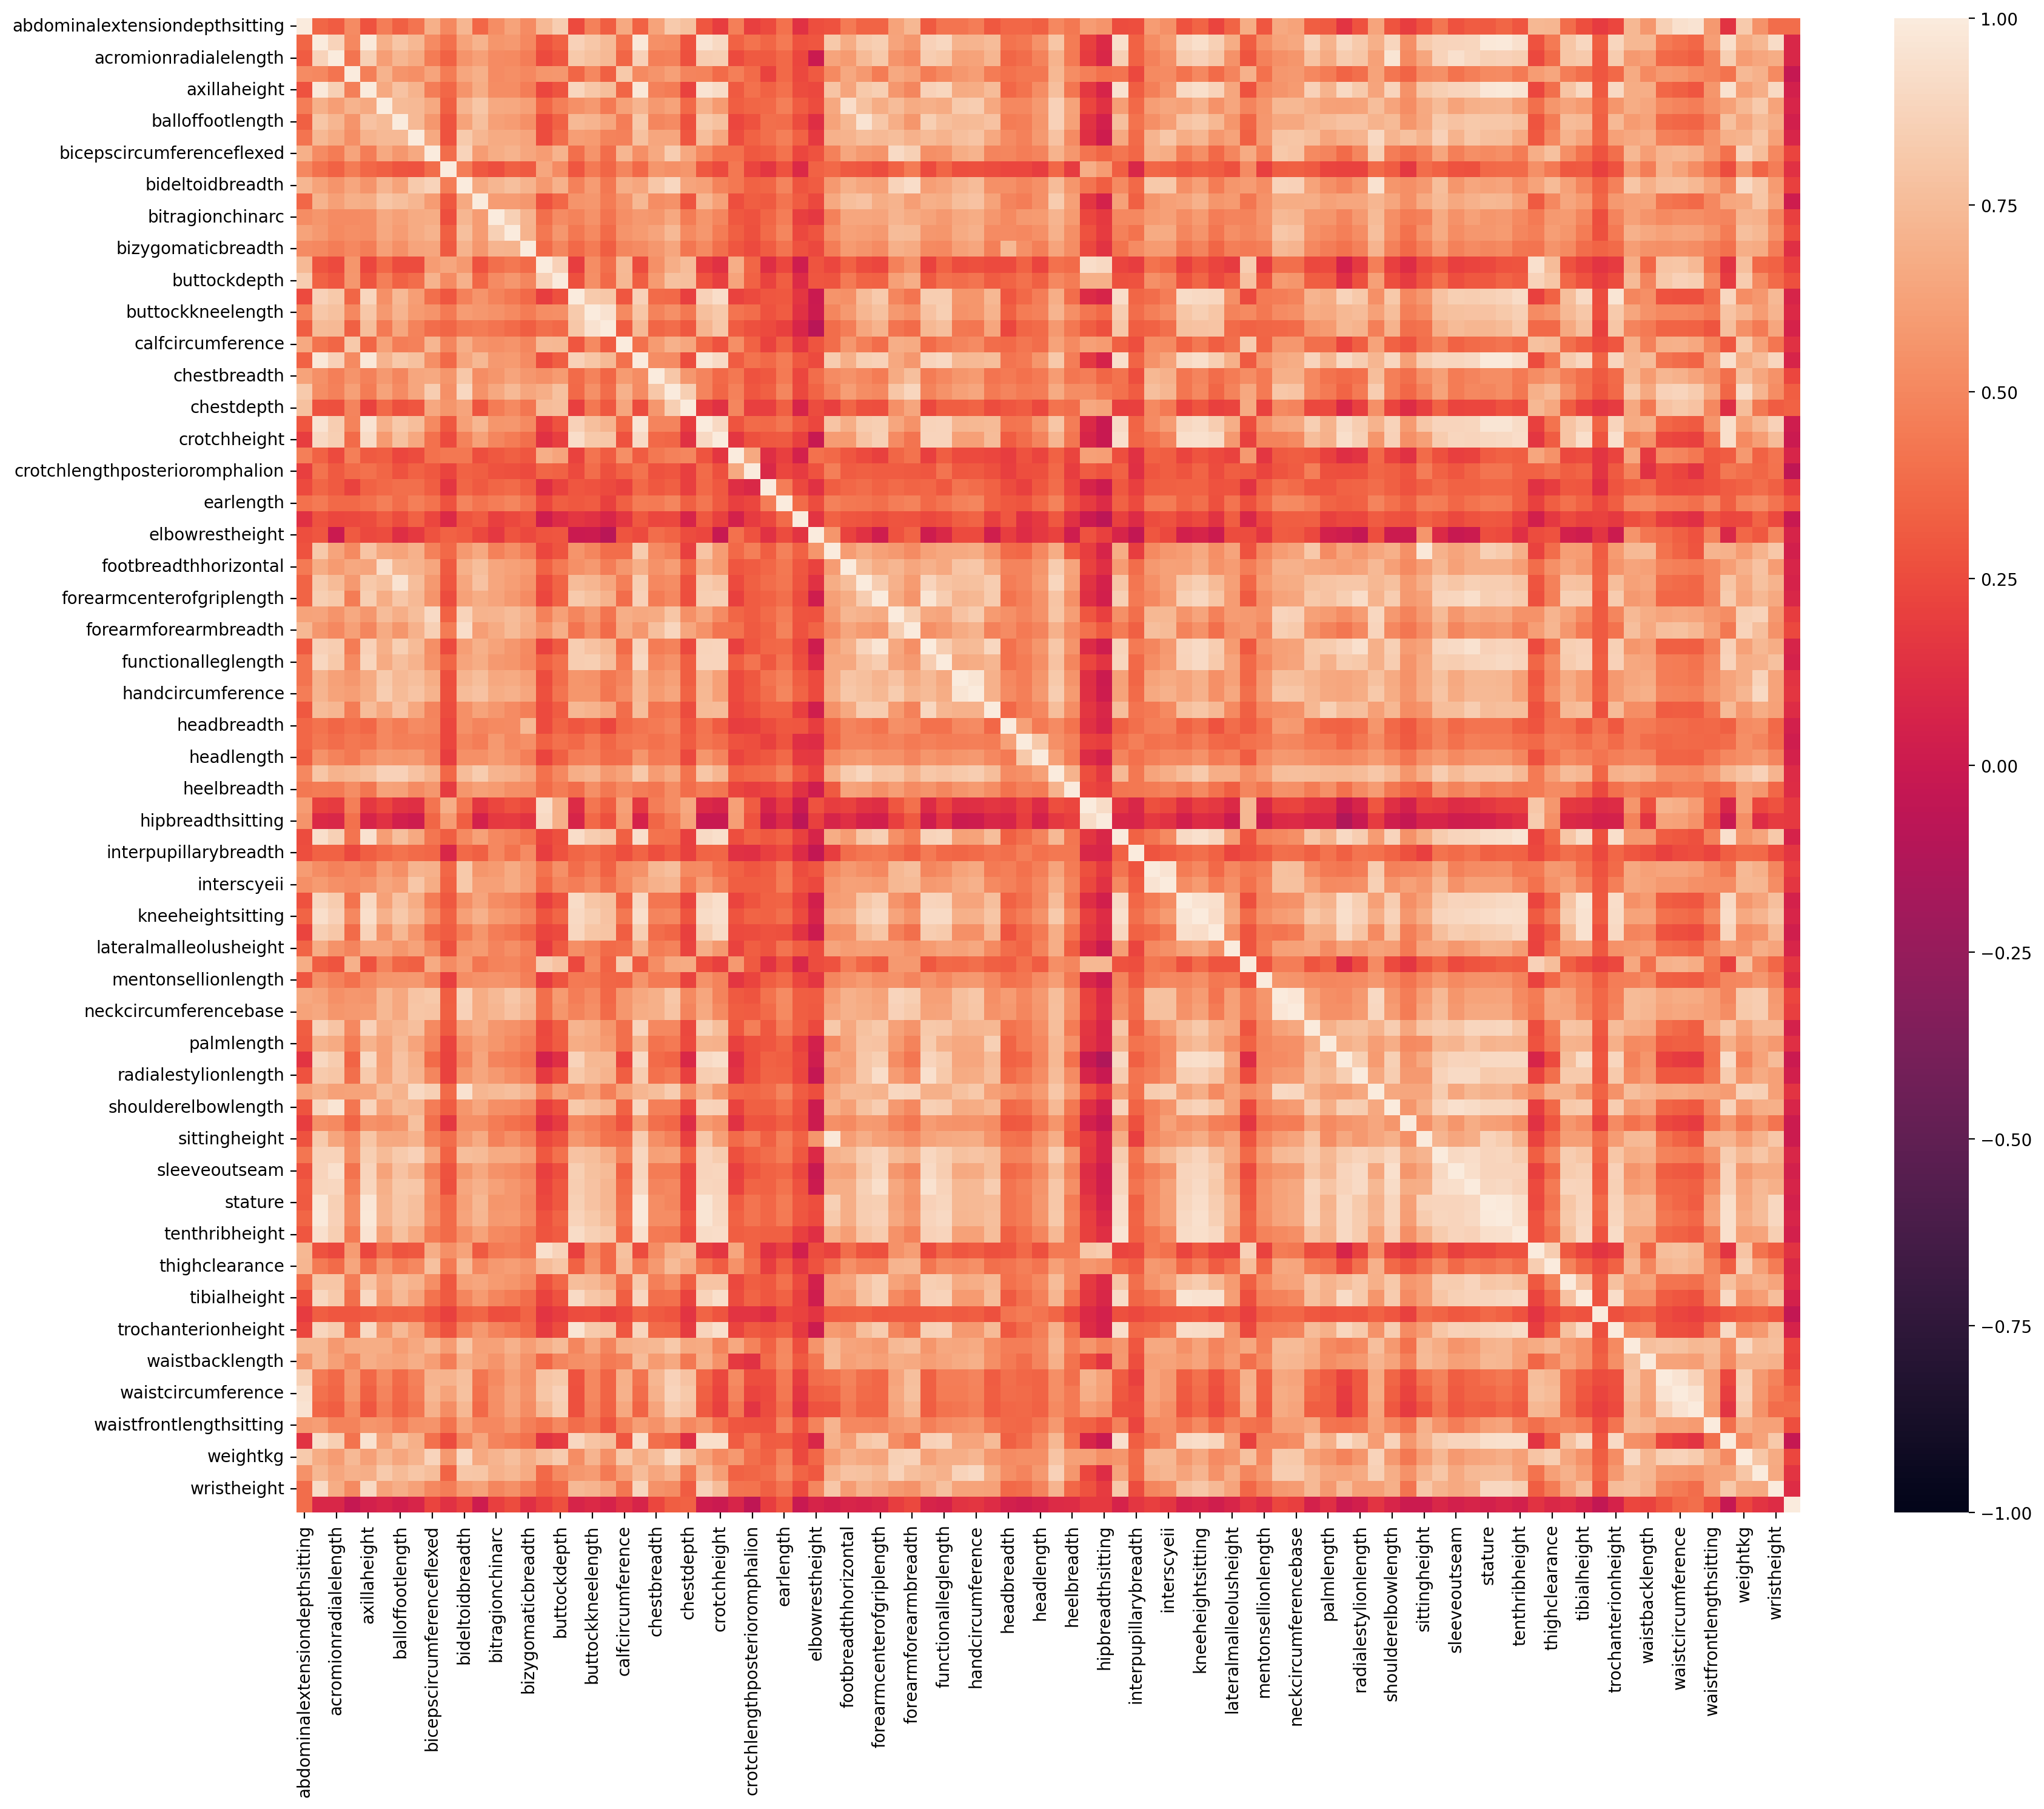

In [19]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1);

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   abdominalextensiondepthsitting  5769 non-null   int64  
 1   acromialheight                  5769 non-null   int64  
 2   acromionradialelength           5769 non-null   int64  
 3   anklecircumference              5769 non-null   int64  
 4   axillaheight                    5769 non-null   int64  
 5   balloffootcircumference         5769 non-null   int64  
 6   balloffootlength                5769 non-null   int64  
 7   biacromialbreadth               5769 non-null   int64  
 8   bicepscircumferenceflexed       5769 non-null   int64  
 9   bicristalbreadth                5769 non-null   int64  
 10  bideltoidbreadth                5769 non-null   int64  
 11  bimalleolarbreadth              5769 non-null   int64  
 12  bitragionchinarc                57


buttockheight
buttockkneelength
buttockpopliteallength
cervicaleheight
chestbreadth
chestheight
crotchheight
earlength
earprotrusion
elbowrestheight
eyeheightsitting
forearmcenterofgriplength
forearmforearmbreadth
forearmhandlength
handbreadth
handlength
headbreadth
headcircumference
headlength
heelbreadth
iliocristaleheight
interscyei
interscyeii
kneeheightmidpatella
kneeheightsitting
lateralfemoralepicondyleheight
lateralmalleolusheight
neckcircumference
neckcircumferencebase
overheadfingertipreachsitting
palmlength
poplitealheight
radialestylionlength
shoulderelbowlength
sittingheight
sleevelengthspinewrist
sleeveoutseam
span
stature
suprasternaleheight
tenthribheight
thighcircumference
thighclearance
thumbtipreach
tibialheight  
tragiontopofhead                                  
trochanterionheight
verticaltrunkcircumferenceusa
waistbacklength
waistbreadth
waistcircumference
waistfrontlengthsitting
waistheightomphalion
wristcircumference
wristheight
SubjectsBirthLocation
Age
Gender
                          
selected_columns = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength',
                    'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight', '']
selected_df = df[selected_columns]

In [21]:
df_copy.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [22]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [23]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [24]:
import sklearn

In [25]:
sklearn.__version__  # 1.3.1

'1.2.2'

In [26]:
# !conda install --upgrade Jinja2

In [27]:
# !pip install --upgrade Jinja2

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [29]:
df_copy.shape

(5769, 98)

In [30]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [31]:
y_train

5165    White
5393    White
5659    White
3628    White
2914    White
        ...  
5346    White
4192    White
887     White
3891    White
5015    White
Name: DODRace, Length: 4615, dtype: object

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model
class weight__
(Afnan, Raya, Maram)


### Vanilla Logistic Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   8  12]
 [  6  79  51]
 [  7  25 726]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94       260
    Hispanic       0.71      0.58      0.64       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.82      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 978    7   53]
 [  20  350  173]
 [  31   66 2937]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.95      1038
    Hispanic       0.83      0.64      0.72       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.85      0.87      4615
weighted avg       0.92      0.92      0.92      4615



### Cross validation

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.365
score_time                 0.026
test_accuracy              0.897
train_accuracy             0.925
test_precision_weighted    0.893
train_precision_weighted   0.922
test_recall_weighted       0.897
train_recall_weighted      0.925
test_f1_weighted           0.893
train_f1_weighted          0.922
dtype: float64

In [37]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=[3])
precision_hispanic = make_scorer(precision_score, average=None, labels=[3])
recall_hispanic = make_scorer(recall_score, average=None, labels=[3])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [38]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.445
score_time                 0.024
test_f1_hispanic           0.000
train_f1_hispanic          0.000
test_precision_hispanic    0.000
train_precision_hispanic   0.000
test_recall_hispanic       0.000
train_recall_hispanic      0.000
dtype: float64

### Logistic Model GridsearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [40]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [41]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.000
mean_train_score   0.000
Name: 0, dtype: object

In [42]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0 260]
 [  0   0 136]
 [  0   0 758]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00       260
    Hispanic       0.00      0.00      0.00       136
       White       0.66      1.00      0.79       758

    accuracy                           0.66      1154
   macro avg       0.22      0.33      0.26      1154
weighted avg       0.43      0.66      0.52      1154


Train_Set
[[   0    0 1038]
 [   0    0  543]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00      1038
    Hispanic       0.00      0.00      0.00       543
       White       0.66      1.00      0.79      3034

    accuracy                           0.66      4615
   macro avg       0.22      0.33      0.26      4615
weighted avg       0.43      0.66      0.52      4615



# Class weight for logisticRegression Model

(Afnan, Raya, Maram)

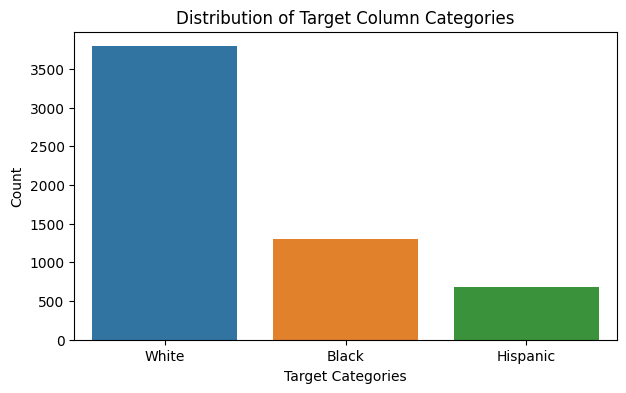

In [43]:
# demonstrate the target column distribution
sns.countplot(x="DODRace", data=df_copy)
plt.title("Distribution of Target Column Categories")
plt.xlabel("Target Categories")
plt.ylabel("Count")
plt.show()

In [44]:
# converting the dependent variable to float
df["DODRace"] = df["DODRace"].astype(float)

In [45]:
# Try to maximize the Recall score by balance the data
lr = LogisticRegression(C=10, solver="saga", class_weight="balanced")

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_balanced = Pipeline(steps=operations)

pipe_model_balanced.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='saga'))])

In [46]:
eval_metric(pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[237  14   9]
 [  5 107  24]
 [ 14  92 652]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 982   34   22]
 [  17  460   66]
 [  67  342 2625]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [47]:
# change the class_weight to None

lr = LogisticRegression(C=10, solver="saga", class_weight=None)

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_None = Pipeline(steps=operations)

pipe_model_None.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [48]:
eval_metric(pipe_model_None, X_train, y_train, X_test, y_test)

Test_Set
[[237   8  15]
 [  4  83  49]
 [  5  23 730]]
              precision    recall  f1-score   support

       Black       0.96      0.91      0.94       260
    Hispanic       0.73      0.61      0.66       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.87      0.83      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 969   10   59]
 [  22  335  186]
 [  30   67 2937]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94      1038
    Hispanic       0.81      0.62      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.84      0.86      4615
weighted avg       0.92      0.92      0.92      4615



In [50]:
# Using the ClusterCentroids to balance the target column in training data
from collections import Counter

from imblearn.under_sampling import ClusterCentroids

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test)

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

[('Black', 543), ('Hispanic', 543), ('White', 543)]


In [51]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=10, solver='saga')

In [52]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [53]:
eval_metric_(lr_resampled, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[215  31  14]
 [ 13  93  30]
 [ 33 221 504]]
              precision    recall  f1-score   support

       Black       0.82      0.83      0.83       260
    Hispanic       0.27      0.68      0.39       136
       White       0.92      0.66      0.77       758

    accuracy                           0.70      1154
   macro avg       0.67      0.73      0.66      1154
weighted avg       0.82      0.70      0.74      1154


Train_Set
[[463  47  33]
 [ 64 346 133]
 [ 12 127 404]]
              precision    recall  f1-score   support

       Black       0.86      0.85      0.86       543
    Hispanic       0.67      0.64      0.65       543
       White       0.71      0.74      0.73       543

    accuracy                           0.74      1629
   macro avg       0.74      0.74      0.74      1629
weighted avg       0.74      0.74      0.74      1629



In [54]:
# Using the ClusterCentroids to balance the target column for testing data
from collections import Counter

from imblearn.under_sampling import ClusterCentroids

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test)

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
X_resampled_test, y_resampled_test = cc.fit_resample(X_test_encoded, y_test)
print(sorted(Counter(y_resampled_test).items()))
# reset_index

[('Black', 136), ('Hispanic', 136), ('White', 136)]


In [55]:
def eval_metric_balanced(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_resampled_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [56]:
eval_metric_balanced(
    lr_resampled, X_resampled, y_resampled, X_resampled_test, y_resampled_test
)

Test_Set
[[111  17   8]
 [ 13  93  30]
 [  2  37  97]]
              precision    recall  f1-score   support

       Black       0.88      0.82      0.85       136
    Hispanic       0.63      0.68      0.66       136
       White       0.72      0.71      0.72       136

    accuracy                           0.74       408
   macro avg       0.74      0.74      0.74       408
weighted avg       0.74      0.74      0.74       408


Train_Set
[[463  47  33]
 [ 64 346 133]
 [ 12 127 404]]
              precision    recall  f1-score   support

       Black       0.86      0.85      0.86       543
    Hispanic       0.67      0.64      0.65       543
       White       0.71      0.74      0.73       543

    accuracy                           0.74      1629
   macro avg       0.74      0.74      0.74      1629
weighted avg       0.74      0.74      0.74      1629



In [58]:
 pip install scikit-plot

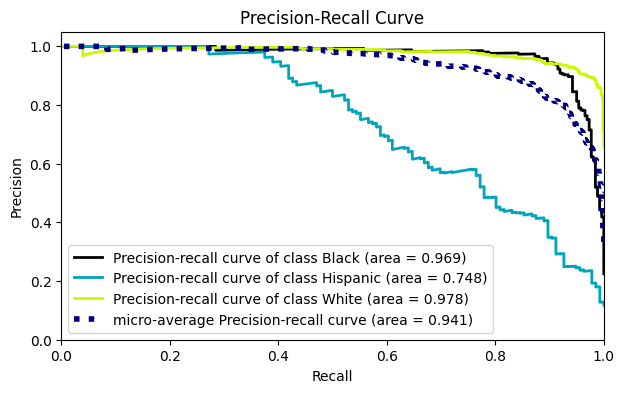

In [59]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve

operations = [
    ("encoder", column_trans),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(C=0.1, class_weight="balanced", solver="saga")),
]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC
(Shahad, Marwa, Atheer, Reema, Rahaf)

### Vanilla SVC model

In [60]:
from sklearn.svm import SVC



operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[229   1  30]
 [  5  52  79]
 [  6   9 743]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.92       260
    Hispanic       0.84      0.38      0.53       136
       White       0.87      0.98      0.92       758

    accuracy                           0.89      1154
   macro avg       0.89      0.75      0.79      1154
weighted avg       0.89      0.89      0.87      1154


Train_Set
[[ 949    4   85]
 [  23  263  257]
 [  11   15 3008]]
              precision    recall  f1-score   support

       Black       0.97      0.91      0.94      1038
    Hispanic       0.93      0.48      0.64       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.93      0.80      0.84      4615
weighted avg       0.92      0.91      0.91      4615



In [61]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.000
train_f1_hispanic          0.000
test_precision_hispanic    0.000
train_precision_hispanic   0.000
test_recall_hispanic       0.000
train_recall_hispanic      0.000
dtype: float64

In [62]:
#SVM with balancing

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  11  14]
 [  6 102  28]
 [ 10  87 661]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.51      0.75      0.61       136
       White       0.94      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 985   22   31]
 [  13  488   42]
 [  43  313 2678]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.59      0.90      0.71       543
       White       0.97      0.88      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.86      4615
weighted avg       0.92      0.90      0.91      4615



In [63]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.000
train_f1_hispanic          0.000
test_precision_hispanic    0.000
train_precision_hispanic   0.000
test_recall_hispanic       0.000
train_recall_hispanic      0.000
dtype: float64

###  SVC Model GridsearchCV

In [64]:
param_grid = {'SVC__C': [0.01, 0.03, 0.02, 0.1],
               'SVC__gamma': [0.03,0.01 ,0.1],
#               'SVC__kernel': ['rbf', 'linear'],
#               'SVC__class_weight': ["balanced", None]
#               'SVC__degree':[2,3]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True,
                              verbose=2)

In [65]:
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.03, 0.02, 0.1],
                         'SVC__gamma': [0.03, 0.01, 0.1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=2)

In [66]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC', SVC(C=0.01, gamma=0.03))])

In [67]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.000
mean_train_score   0.000
Name: 0, dtype: object

In [68]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0 260]
 [  0   0 136]
 [  0   0 758]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00       260
    Hispanic       0.00      0.00      0.00       136
       White       0.66      1.00      0.79       758

    accuracy                           0.66      1154
   macro avg       0.22      0.33      0.26      1154
weighted avg       0.43      0.66      0.52      1154


Train_Set
[[   0    0 1038]
 [   0    0  543]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00      1038
    Hispanic       0.00      0.00      0.00       543
       White       0.66      1.00      0.79      3034

    accuracy                           0.66      4615
   macro avg       0.22      0.33      0.26      4615
weighted avg       0.43      0.66      0.52      4615



In [69]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model_grid,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits


test_f1_hispanic           0.000
train_f1_hispanic          0.000
test_precision_hispanic    0.000
train_precision_hispanic   0.000
test_recall_hispanic       0.000
train_recall_hispanic      0.000
dtype: float64

## 3. RF
(Sarah-46, Norah, TAIF, Hibah, Salma)

### Vanilla RF Model

In [70]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [72]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   5  57]
 [  9  10 117]
 [ 17   5 736]]
              precision    recall  f1-score   support

       Black       0.88      0.76      0.82       260
    Hispanic       0.50      0.07      0.13       136
       White       0.81      0.97      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.60      0.61      1154
weighted avg       0.79      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [73]:
# from sklearn.ensemble import RandomForestClassifier

# RF = RandomForestClassifier()

# operations = [("encoder", column_trans), ("RF", RF)]

# rf_model = Pipeline(steps=operations)

# rf_model.fit(X_train, y_train)


# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [74]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[180   0  80]
 [ 10   2 124]
 [  7   0 751]]
              precision    recall  f1-score   support

       Black       0.91      0.69      0.79       260
    Hispanic       1.00      0.01      0.03       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.90      0.57      0.56      1154
weighted avg       0.84      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [75]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=101))])

In [76]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[197  45  18]
 [ 14  87  35]
 [ 68 306 384]]
              precision    recall  f1-score   support

       Black       0.71      0.76      0.73       260
    Hispanic       0.20      0.64      0.30       136
       White       0.88      0.51      0.64       758

    accuracy                           0.58      1154
   macro avg       0.59      0.63      0.56      1154
weighted avg       0.76      0.58      0.62      1154


Train_Set
[[ 765  174   99]
 [  55  353  135]
 [ 284 1072 1678]]
              precision    recall  f1-score   support

       Black       0.69      0.74      0.71      1038
    Hispanic       0.22      0.65      0.33       543
       White       0.88      0.55      0.68      3034

    accuracy                           0.61      4615
   macro avg       0.60      0.65      0.57      4615
weighted avg       0.76      0.61      0.65      4615



In [77]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [78]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])


scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [79]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.072
train_f1_hispanic          1.000
test_precision_hispanic    0.692
train_precision_hispanic   1.000
test_recall_hispanic       0.039
train_recall_hispanic      1.000
dtype: float64

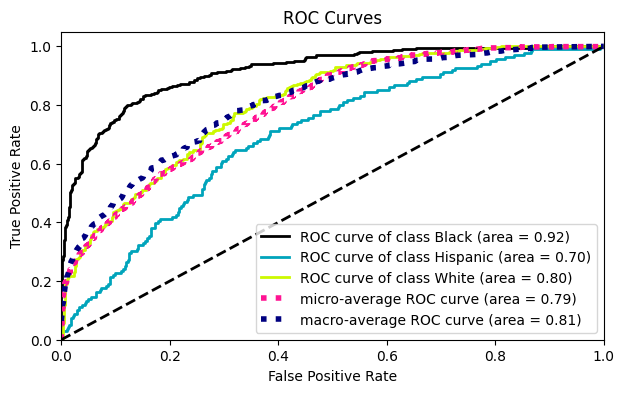

In [80]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

In [81]:
pipe_model["RF_model"].feature_importances_

array([1.73964482e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.33668424e-03, 1.38758417e-03, 8.48786323e-04, 9.16509347e-03,
       1.72033220e-04, 1.07195002e-03, 0.00000000e+00, 2.10208676e-03,
       4.36956097e-02, 7.00002914e-04, 5.68328186e-04, 5.59206507e-03,
       6.66318016e-04, 4.04651604e-03, 0.00000000e+00, 1.37076351e-03,
       2.77532757e-02, 4.41155339e-02, 5.88704190e-02, 0.00000000e+00,
       1.29696426e-02, 1.48564744e-03, 2.58630884e-03, 5.93358660e-04,
       5.02928379e-03, 1.74164999e-02, 0.00000000e+00, 6.57474176e-04,
       0.00000000e+00, 1.89177697e-02, 3.05486553e-02, 1.17256256e-01,
       5.80433795e-02, 0.00000000e+00, 4.88011373e-04, 1.84548863e-02,
       1.44671576e-03, 1.72823324e-03, 1.91956198e-02, 1.53075238e-03,
       0.00000000e+00, 1.68793550e-03, 2.00701288e-02, 7.64515360e-04,
       9.17224688e-03, 3.56995354e-03, 3.20256837e-04, 2.67773402e-02,
       2.08918954e-03, 4.45610814e-04, 1.73700231e-02, 4.54550834e-02,
      

In [82]:
features = pipe_model["encoder"].get_feature_names_out()
features

array(['Gender', 'WritingPreference', 'SubjectsBirthLocation',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbread

In [83]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_,
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
elbowrestheight,0.117
sittingheight,0.090
buttockpopliteallength,0.059
eyeheightsitting,0.058
interpupillarybreadth,0.045
...,...
sleevelengthspinewrist,0.000
buttockcircumference,0.000
earbreadth,0.000
shoulderlength,0.000


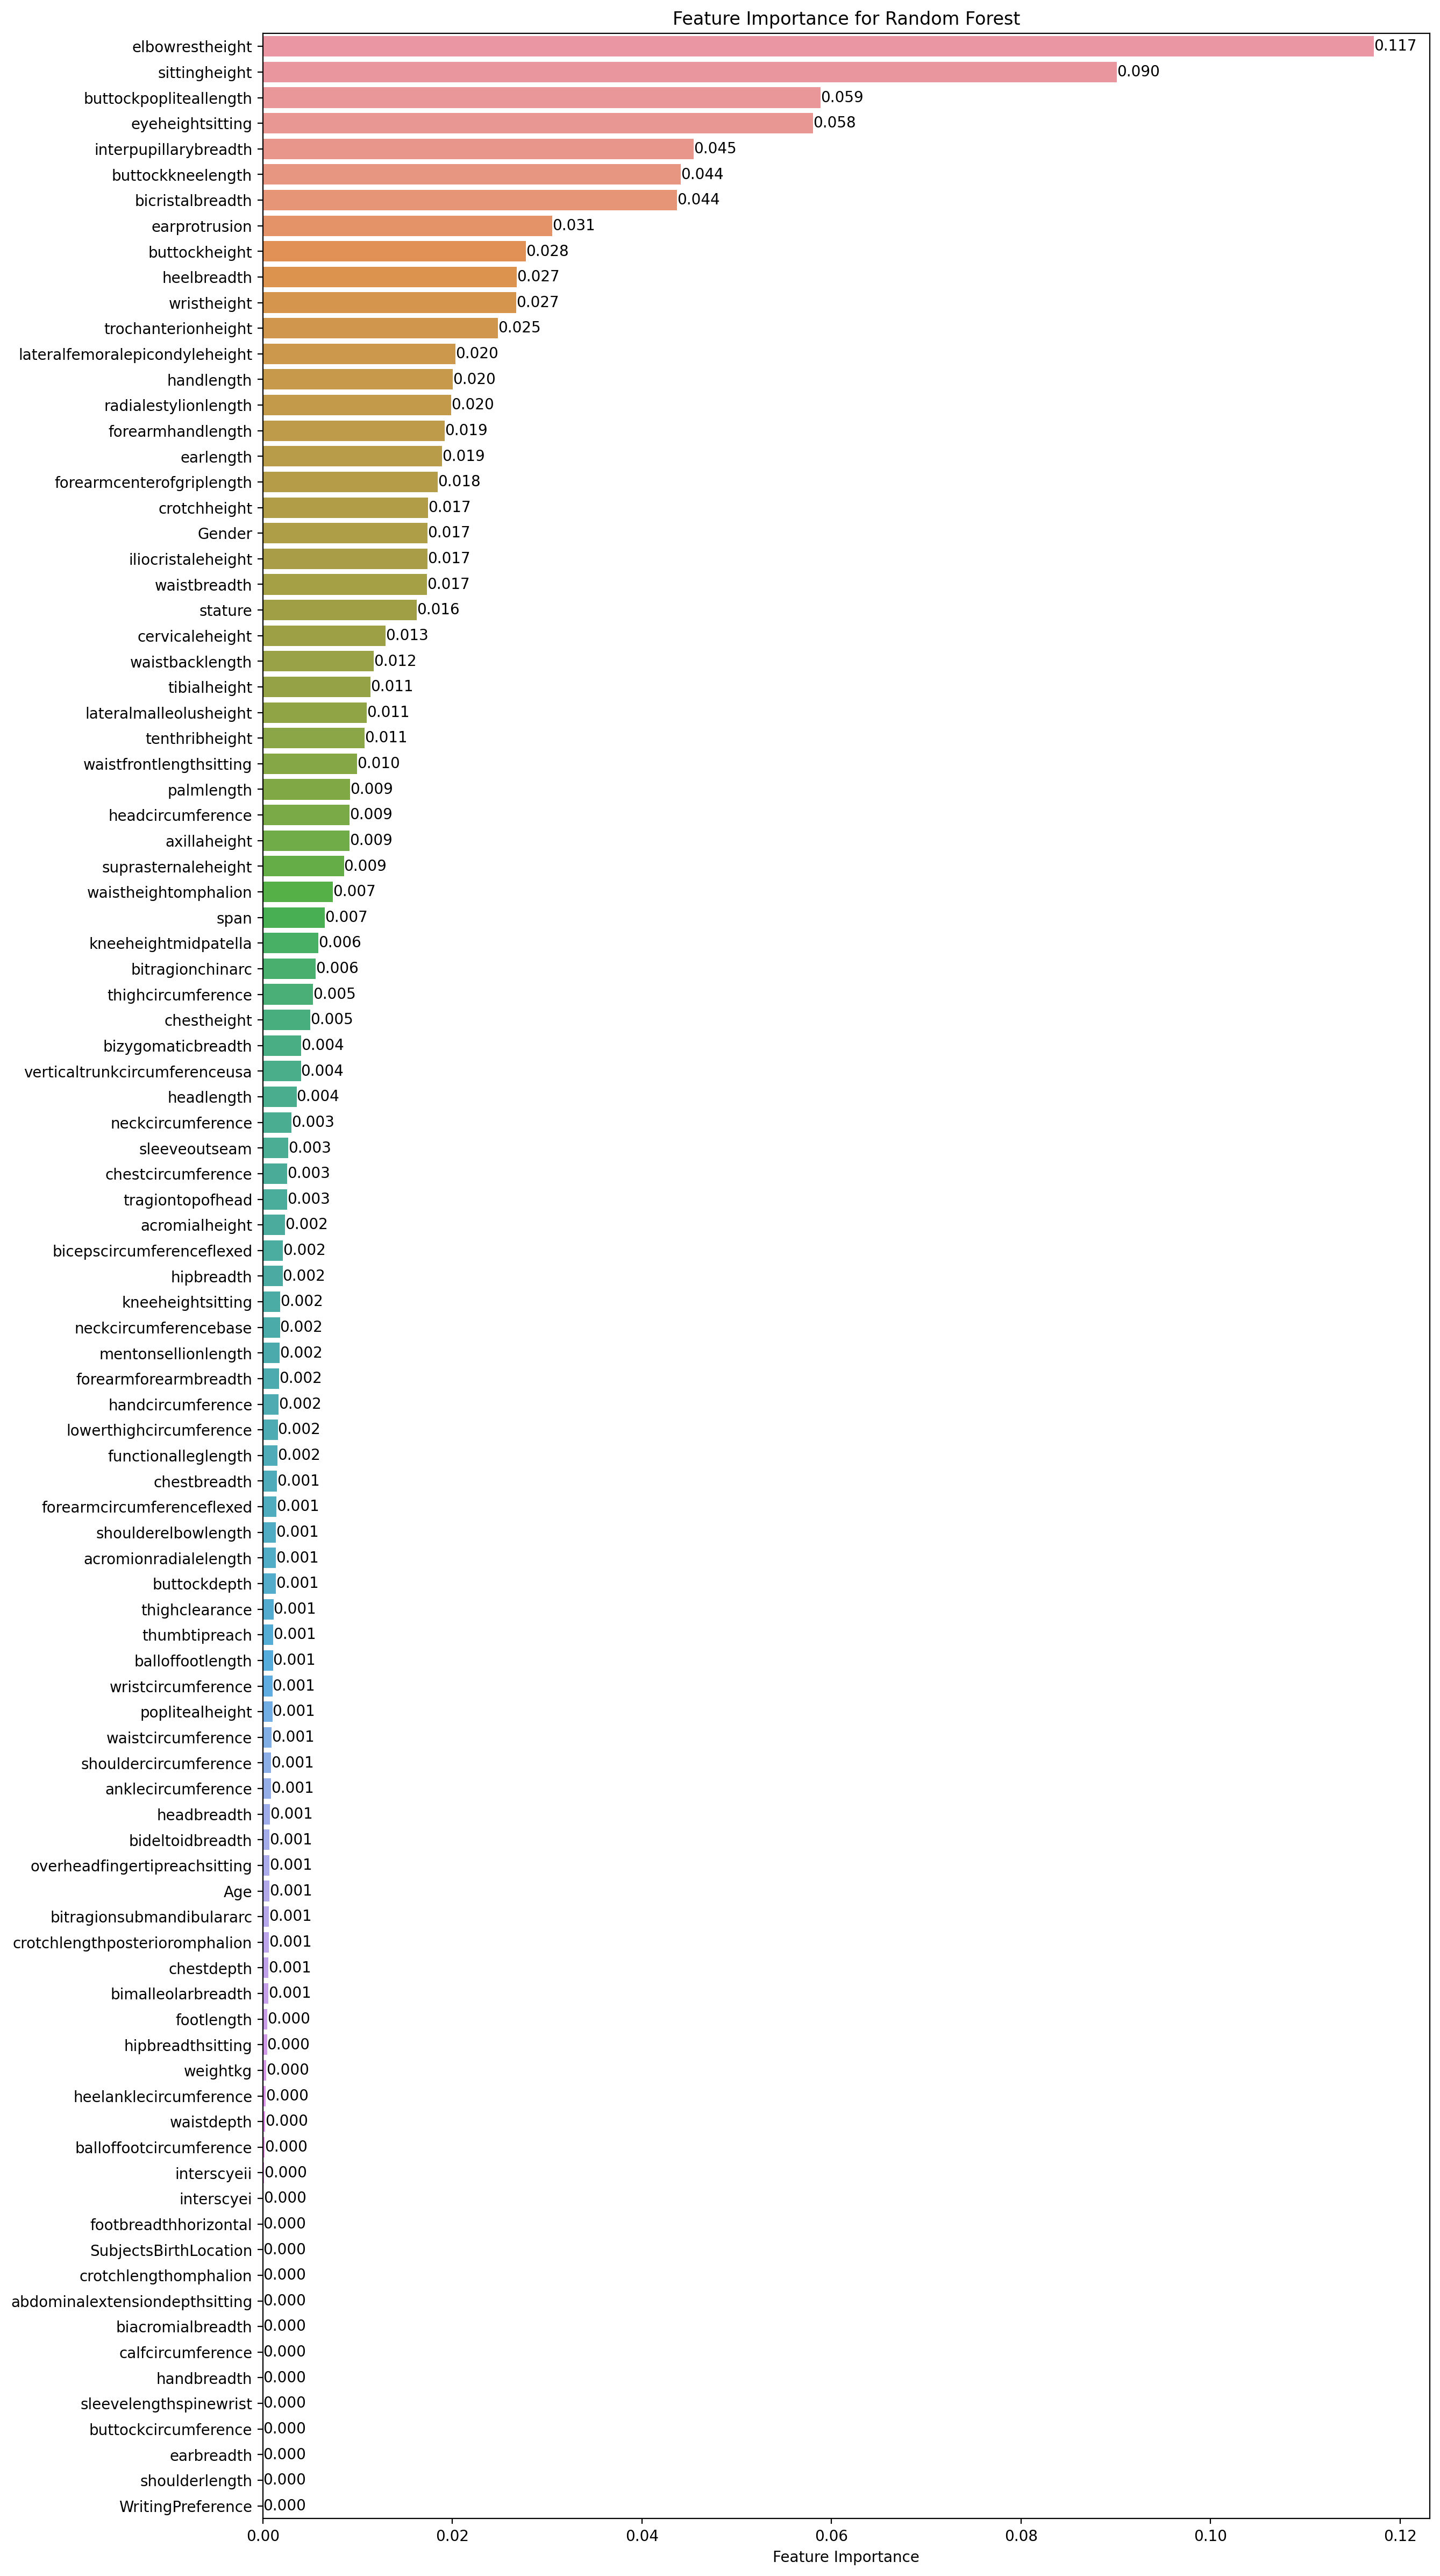

In [84]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [85]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features, #features_names=X.columns
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);

In [86]:
RF_model = RandomForestClassifier(random_state=101,
                                  max_samples=0.5)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])

In [87]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

Test_Set
[[193   3  64]
 [ 11  10 115]
 [ 16   5 737]]
              precision    recall  f1-score   support

       Black       0.88      0.74      0.80       260
    Hispanic       0.56      0.07      0.13       136
       White       0.80      0.97      0.88       758

    accuracy                           0.81      1154
   macro avg       0.75      0.60      0.60      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[1017    0   21]
 [   5  430  108]
 [   1    0 3033]]
              precision    recall  f1-score   support

       Black       0.99      0.98      0.99      1038
    Hispanic       1.00      0.79      0.88       543
       White       0.96      1.00      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.98      0.92      0.95      4615
weighted avg       0.97      0.97      0.97      4615



### RF Model GridsearchCV

In [88]:
# param_grid = {'n_estimators':[64, 128, 200],
#              'max_features':[2, 4, 'sqrt']
#              'max_depth':[2, 3, 4],
#              'min_samples_split':[2, 3,4],
#              'min_samples_leaf': [2,3,4],
#              'max_samples':[0.8, 1]}


param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

In [89]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [90]:
%%time
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
CPU times: user 12.9 s, sys: 1.09 s, total: 14 s
Wall time: 8min 47s


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

## 4. XGBoost
(Hussam, Ammar, Raied)



## Vanilla XGBoost Model

In [93]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [94]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [95]:
import sklearn

In [96]:
sklearn.__version__  # 1.3.1

'1.2.2'

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [98]:
df_copy.shape

(5769, 98)

In [99]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]

0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [100]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [101]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [102]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [104]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



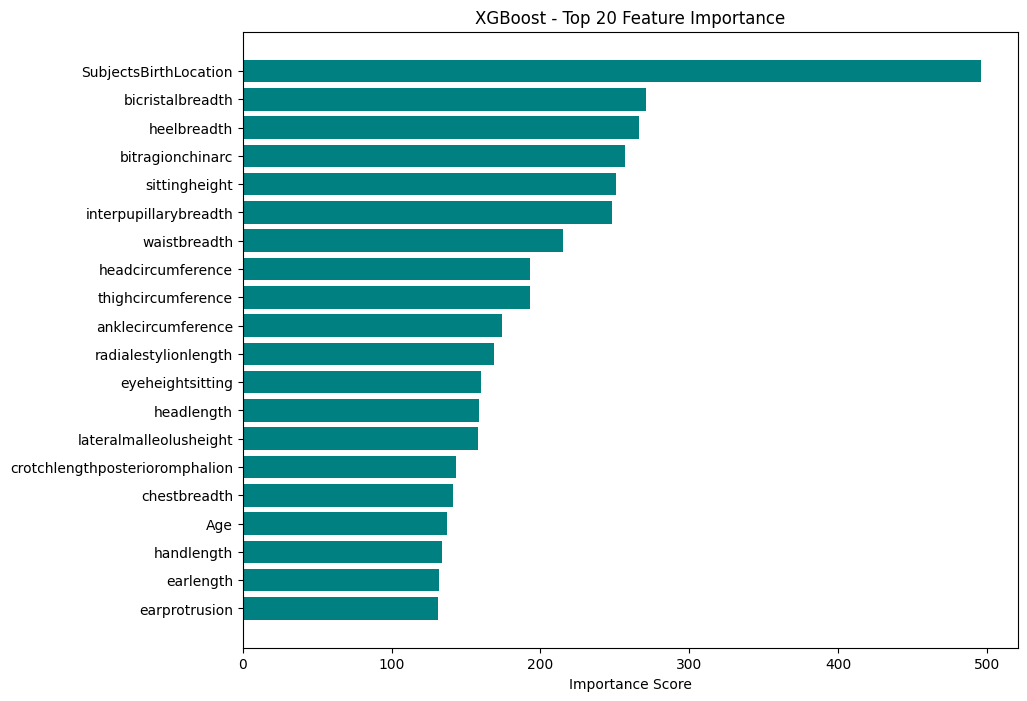

In [105]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [106]:
features

('SubjectsBirthLocation',
 'bicristalbreadth',
 'heelbreadth',
 'bitragionchinarc',
 'sittingheight',
 'interpupillarybreadth',
 'waistbreadth',
 'headcircumference',
 'thighcircumference',
 'anklecircumference',
 'radialestylionlength',
 'eyeheightsitting',
 'headlength',
 'lateralmalleolusheight',
 'crotchlengthposterioromphalion',
 'chestbreadth',
 'Age',
 'handlength',
 'earlength',
 'earprotrusion',
 'wristcircumference',
 'buttockpopliteallength',
 'tragiontopofhead',
 'bizygomaticbreadth',
 'elbowrestheight',
 'bicepscircumferenceflexed',
 'buttockkneelength',
 'calfcircumference',
 'waistfrontlengthsitting',
 'forearmhandlength',
 'chestdepth',
 'palmlength',
 'buttockdepth',
 'bitragionsubmandibulararc',
 'crotchlengthomphalion',
 'thighclearance',
 'mentonsellionlength',
 'wristheight',
 'lowerthighcircumference',
 'shoulderelbowlength',
 'waistbacklength',
 'forearmcenterofgriplength',
 'handbreadth',
 'thumbtipreach',
 'bimalleolarbreadth',
 'shouldercircumference',
 'chest

# CV XGBoost Model

In [108]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [109]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   3.829
score_time                 0.017
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [111]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [114]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':1, 'black':2, 'hispanic': 3

# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [115]:
from sklearn.model_selection import cross_val_score, cross_validate


pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   2.568
score_time                 0.017
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

## GridSearch

In [116]:

# param_grid = {"xgboost__n_estimators":[50, 100, 200],
#               'xgboost__max_depth':[3,4,5],
#               "xgboost__learning_rate": [0.1, 0.2],
#               "xgboost__subsample":[0.5, 0.8, 1],
#               "xgboost__colsample_bytree":[0.5,0.7, 1],
#              "xgboost__reg_alpha": [0, 0.25, 0.5, 0.75, 1],
# }

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}



In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   4.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      cal...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [118]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [119]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.361
mean_train_score   0.715
Name: 193, dtype: object

In [120]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[227   5  28]
 [  8  51  77]
 [  8  12 738]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       260
           1       0.75      0.38      0.50       136
           2       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[ 987    2   49]
 [  23  353  167]
 [   6   11 3017]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1038
           1       0.96      0.65      0.78       543
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.96      0.87      0.90      4615
weighted avg       0.95      0.94      0.94      4615



## Random Serach

In [ ]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=500,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)




Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=2.961, xgboost__max_depth=10, xgboost__n_estimators=17, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=2.961, xgboost__max_depth=10, xgboost__n_estimators=17, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=2.961, xgboost__max_depth=10, xgboost__n_estimators=17, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=2.961, xgboost__max_depth=10, xgboost__n_estimators=17, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total t

In [ ]:
# Print the best hyperparameters
print(random_search.best_params_)


In [ ]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

In [ ]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

## Logistic Regression Over/ Under Sampling

In [ ]:
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

In [ ]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

In [ ]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [ ]:
eval_metric_(lr_resampled, X_resampled, y_resampled, X_test, y_test)

## Logistic Regression "Over Sampling"

In [ ]:
#Using Somte to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train)

print(sorted(Counter(y_resampled).items()))

In [ ]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

In [ ]:
eval_metric_(lr_resampled, X_resampled_Over, y_resampled_Over, X_test, y_test)

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___